# Regularized Linear Regression Study - EDA + Model Training

#### Import Packages and Data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Import Data

total_data = pd.read_csv('/workspaces/gustavolima-regularized-Lr/data/raw/demographic_health_data.csv')
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [17]:
# Trimm the Categoric (String) 
total_data.drop(['COUNTY_NAME', 'STATE_NAME'], axis=1, inplace=True)


##### Normalize Data

In [18]:
# Normalize the Data
from sklearn.preprocessing import StandardScaler

# Scale Train Data
scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data)
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = total_data.columns)
total_data_norm.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,0.563986,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,-0.219763,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,-0.256918,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,-0.074198,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026


In [ ]:
# Split DataSet into Train / Test
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop('diabetes_number', axis = 1)
y = total_data_norm['diabetes_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_ids = X_train.index.values
test_ids = X_test.index.values

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

In [ ]:
X_train_sel = pd.to_csv('/workspaces/gustavolima-regularized-Lr/data/raw/train_data_health.csv')
X_test_sel = pd.to_csv('/workspaces/gustavolima-regularized-Lr/data/raw/test_data_health.csv')
train_data.head()

### Exploratory Data Analysis (With Treated Data)

#### DataSet Analysis

In [3]:
# Dataset Shape



(3140, 108)

In [4]:
# Dataset Columns Info

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


##### Dataset Initial Trim

In [5]:
# Remove Duplicates

if total_data.duplicated().sum() > 0 :
    total_data.drop_duplicates()

#### Univariate Data Analysis

##### Categorical Univariate Data Analysis

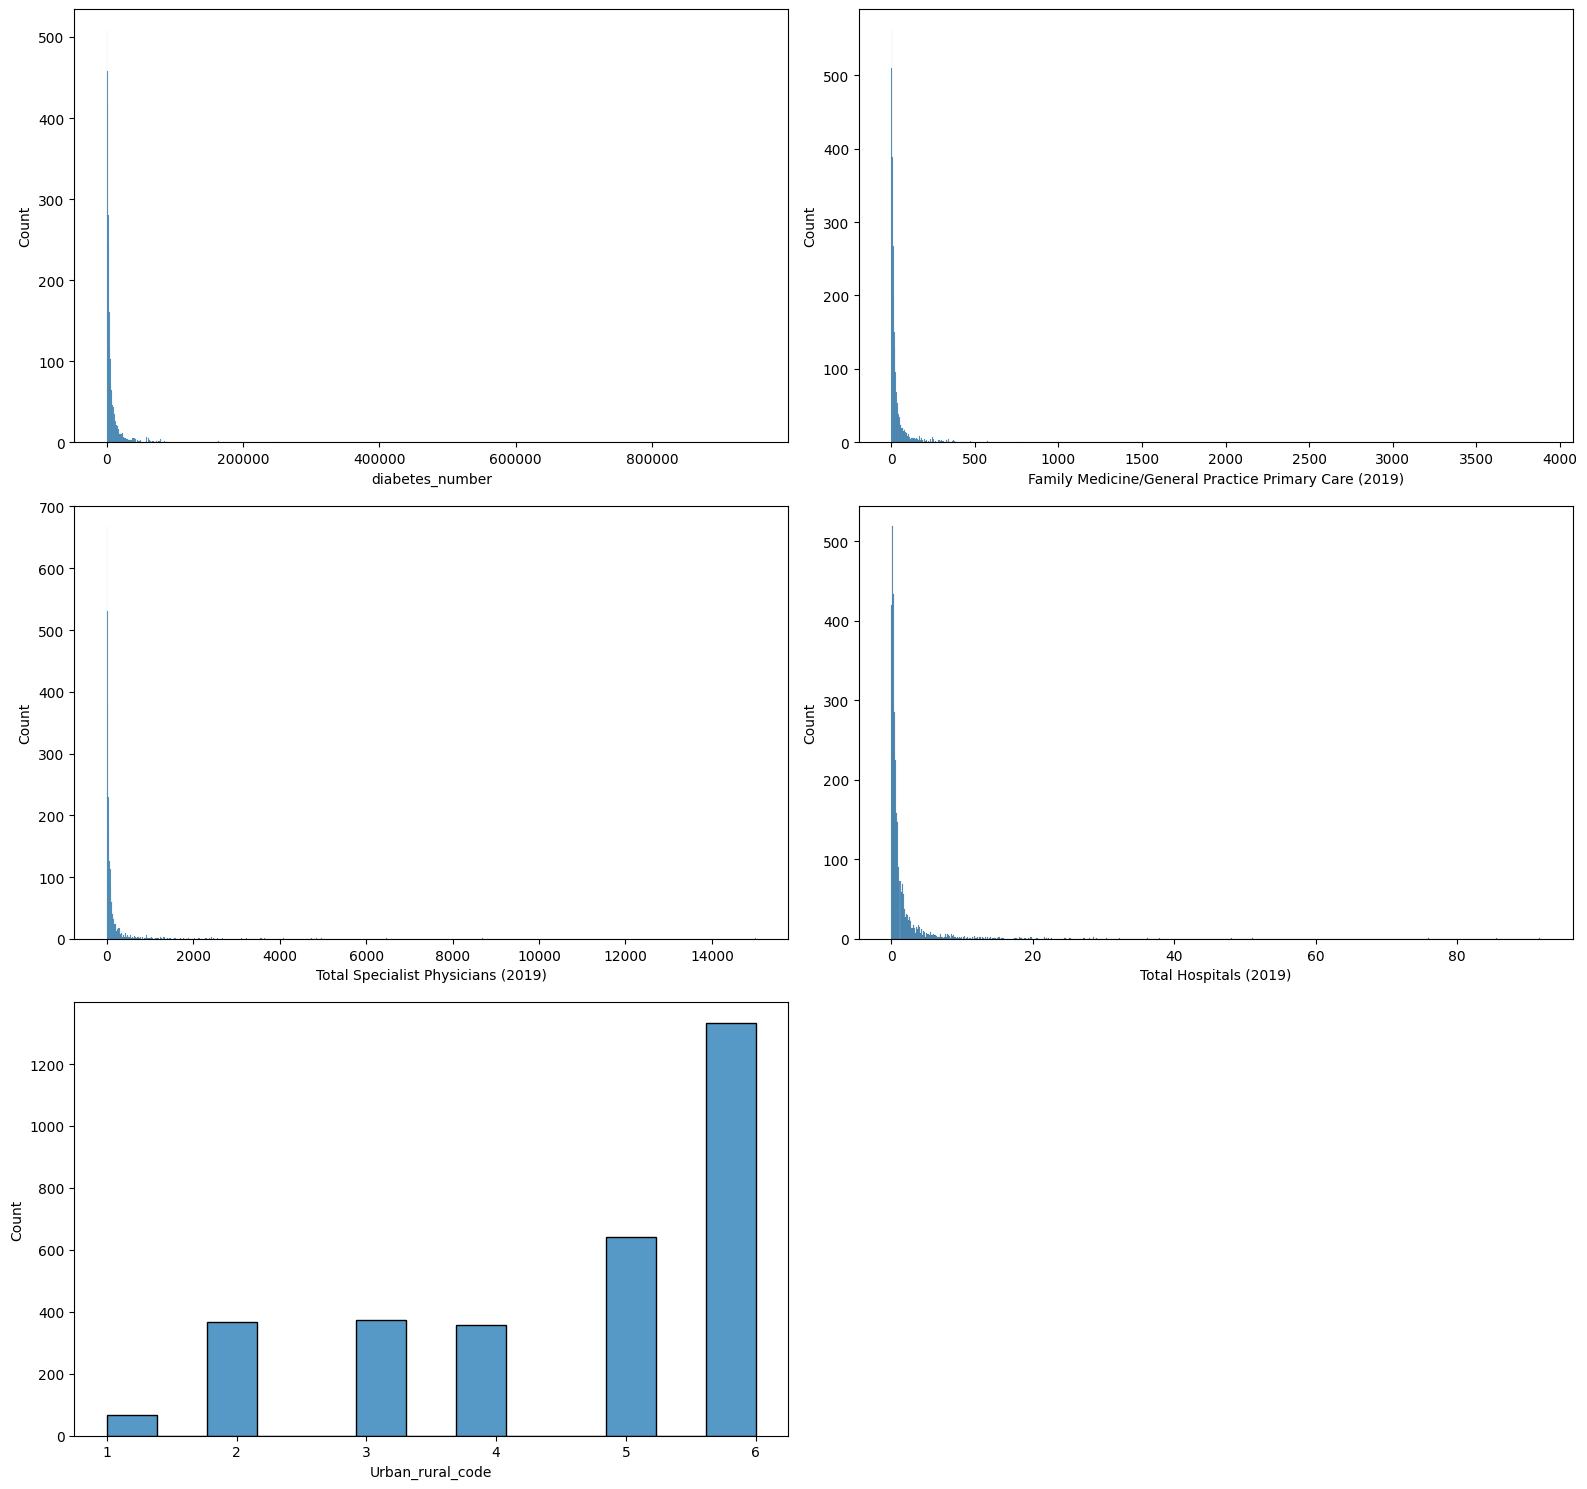

In [11]:
# Categorical Univariate Date Analysis

# Draw Canvas
fig, axis = plt.subplots(3, 2, figsize=(16,15))

# Plot the Data
sns.histplot(ax=axis[0,0], data= total_data, x='diabetes_number')
sns.histplot(ax=axis[0,1], data= total_data, x='Family Medicine/General Practice Primary Care (2019)')
sns.histplot(ax=axis[1,0], data= total_data, x='Total Specialist Physicians (2019)')
sns.histplot(ax=axis[1,1], data= total_data, x='Total Hospitals (2019)')
sns.histplot(ax=axis[2,0], data= total_data, x='Urban_rural_code')
fig.delaxes(axis[2,1])

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()